In [ ]:
# if our large test file is available, use it. Otherwise, use file generated from toy_mstis_2_run.ipynb
import os
test_file = "../toy_mistis_1k_OPS1.nc"
filename = test_file if os.path.isfile(test_file) else "mistis.nc"

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import openpathsampling as paths

In [2]:
storage = paths.AnalysisStorage(filename)

In [3]:
mistis = storage.networks.load(0)

In [4]:
# this should be true if we restored correctly
for ens in mistis.sampling_transitions[0].ensembles:
    print ens in storage.ensembles[:], repr(ens)

True <openpathsampling.ensemble.TISEnsemble object at 0x126b23a10>
True <openpathsampling.ensemble.TISEnsemble object at 0x12b8903d0>
True <openpathsampling.ensemble.TISEnsemble object at 0x12b8bfad0>


In [5]:
mistis.hist_args['max_lambda'] = { 'bin_width' : 0.02, 'bin_range' : (-0.3, 0.5) }
mistis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [6]:
scheme = storage.schemes[0]
scheme.move_summary(storage.steps)

ms_outer_shooting ran 4.250% (expected 4.67%) of the cycles with acceptance 13/17 (76.47%)
repex ran 19.250% (expected 21.03%) of the cycles with acceptance 48/77 (62.34%)
shooting ran 47.000% (expected 46.73%) of the cycles with acceptance 112/188 (59.57%)
minus ran 2.750% (expected 1.87%) of the cycles with acceptance 2/11 (18.18%)
pathreversal ran 26.750% (expected 25.70%) of the cycles with acceptance 48/107 (44.86%)


In [7]:
scheme.move_summary(storage.steps, 'minus')

Minus ran 1.500% (expected 0.93%) of the cycles with acceptance 0/6 (0.00%)
Minus ran 1.250% (expected 0.93%) of the cycles with acceptance 2/5 (40.00%)


In [8]:
# we need to load the states and the innermost interface for each transition
stateA = storage.volumes['A']
stateB = storage.volumes['B']
stateC = storage.volumes['C']
inner_AB = mistis.transitions[(stateA, stateB)].interfaces[0]
inner_AC = mistis.transitions[(stateA, stateC)].interfaces[0]
inner_BA = mistis.transitions[(stateB, stateA)].interfaces[0]

In [9]:
# got these from mistis_flux.ipynb
fluxes = {(stateA, inner_AB): 0.00134206626387,
          (stateA, inner_AC): 0.00130918783318,
          (stateB, inner_BA): 0.00129306050463}
mistis.set_fluxes(fluxes)

In [10]:
mistis.rate_matrix(storage.steps, force=True)

,"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [0.3, inf]})"
"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})",NaN,0.000462027,NaN
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",0.000722619,NaN,0.000167723
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",0.4669794,1,NaN


In [11]:
trans = mistis.transitions.values()[0]
trans_hists = trans.histograms['max_lambda']

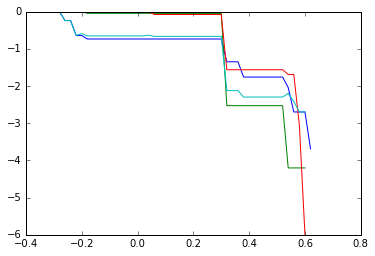

In [12]:
for hist in trans_hists:
    cross_prob = trans_hists[hist].reverse_cumulative()
    plt.plot(cross_prob.x, np.log(cross_prob))
plt.plot(trans.tcp.x, np.log(trans.tcp))